In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import *
from sklearn.naive_bayes import *
from sklearn.metrics import confusion_matrix, classification_report

#Per linear classification
from sklearn.linear_model import Perceptron
from sklearn import svm

import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

print('Libraries imported.')

Libraries imported.


In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
filename = '/content/drive/MyDrive/ColabNotebooks/MachineLearning/HomeWork1_Dataset.tsv'
df = pd.read_csv(filename, sep='\t', header=0)
print('File loaded: %d samples.' %(len(df)))
print("Number of columns: ", len(df.columns))

File loaded: 1000 samples.
Number of columns:  37


In [9]:
X_all = df.iloc[:,:35]
classification_y_all = df['num_collisions']
regression_y_all = df['min_CPA']


#apply normalization
X_normalized = X_all.copy()
for column in X_normalized.columns:
  X_normalized[column] = (X_normalized[column] - X_normalized[column].min()) / (X_normalized[column].max() - X_normalized[column].min())    


reg_y_all_normalized = regression_y_all.copy()
reg_y_all_normalized = (reg_y_all_normalized - reg_y_all_normalized.min()) / (reg_y_all_normalized.max() - reg_y_all_normalized.min())    


#Divisione del dataset normalizzato in train set e training set

In [10]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X_normalized,classification_y_all,train_size=0.66,random_state=200)

print("Dataset x train :", x_train.shape)
print("Dataset y train :", y_train.shape)
print("Dataset x test :", x_test.shape)
print("Dataset y test :", y_test.shape)

Dataset x train : (660, 35)
Dataset y train : (660,)
Dataset x test : (340, 35)
Dataset y test : (340,)


#Barplot distribuzione over the class (unbalanced)

Text(0.5, 1.0, 'Dataset distibution over the number of collisions')

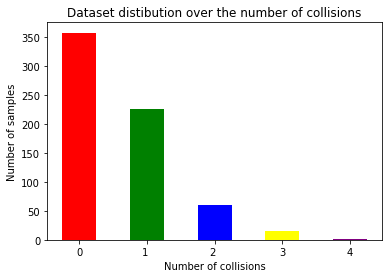

In [13]:
occorrenze_collisioni = y_train.value_counts()
fig,ax = plt.subplots()

ax.bar(x=['0','1 ','2 ','3','4'],height=occorrenze_collisioni,width=0.5, color = ['red','green','blue','yellow','purple'])
ax.set_xlabel ("Number of collisions")
ax.set_ylabel ("Number of samples")
ax.set_title('Dataset distibution over the number of collisions')

#PLOT DATASET (ridotto)


2d Transformation

In [24]:
mds = MDS(2,random_state=0)
X_2d = mds.fit_transform(X_normalized)

Numero di elementi con collisione  0 = 538
Numero di elementi con collisione  1 = 333
Numero di elementi con collisione  2 = 96
Numero di elementi con collisione  3 = 30
Numero di elementi con collisione  4 = 3


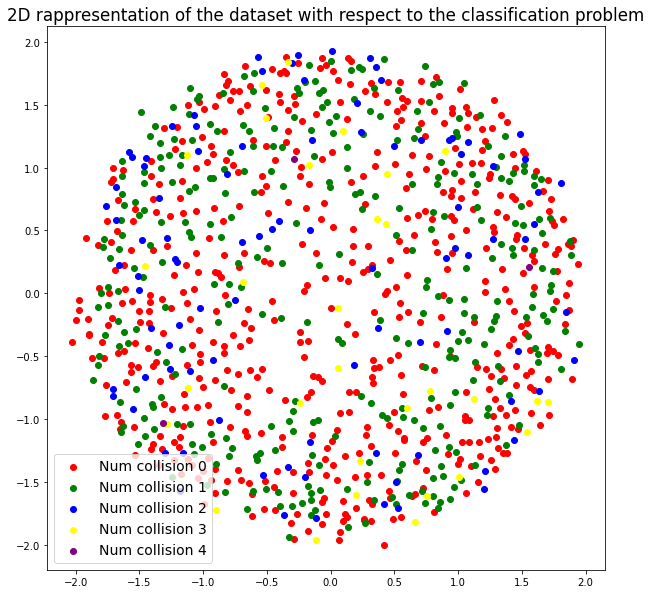

In [25]:
fig,ax = plt.subplots()
colors = ['red','green','blue','yellow','purple']
plt.rcParams['figure.figsize'] = [10, 10]
plt.rc('font', size=14)
for i in np.unique(classification_y_all):
  subset = X_2d[classification_y_all == i]

  print("Numero di elementi con collisione ",i,"=", subset.shape[0]) 
  x = [row[0] for row in subset]
  y = [row[1] for row in subset]  
  ax.scatter(x,y,c=colors[i],label="Num collision "+str(i))
  ax.legend()
  ax.set_title("2D rappresentation of the dataset with respect to the classification problem")

3d transformation

In [8]:
mds = MDS(3,random_state=0)
X_3d = mds.fit_transform(X_normalized)

Numero di elementi con collisione  0 = 538
Numero di elementi con collisione  1 = 333
Numero di elementi con collisione  2 = 96
Numero di elementi con collisione  3 = 30
Numero di elementi con collisione  4 = 3


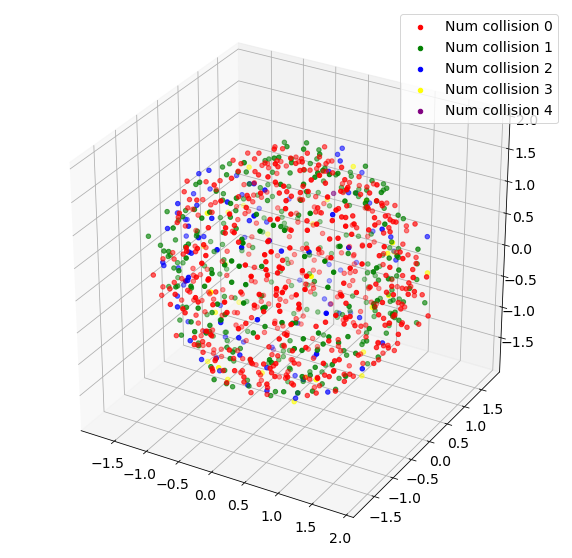

In [18]:
ax = plt.axes(projection='3d')
for i in np.unique(classification_y_all):
  subset = X_3d[classification_y_all == i]

  print("Numero di elementi con collisione ",i,"=", subset.shape[0]) 
  x = [row[0] for row in subset]
  y = [row[1] for row in subset]  
  z = [row[2] for row in subset]  
  ax.scatter3D(x,y,z,c=colors[i],label="Num collision "+str(i))
  ax.legend()


In [ ]:
from sklearn.manifold import MDS
mds = MDS(2,random_state=0)
X_2d = mds.fit_transform(x_train)

In [ ]:
#3D
ax = plt.axes(projection='3d')
for i in y_train:
  x = [row[0] for row in X_2d]
  y = [row[1] for row in X_2d]  
  ax.scatter3D(x,y,i,label="Cpa "+str(i))
plt.show()

In [ ]:
mds = MDS(1,random_state=0)
X_1d = mds.fit_transform(x_train)
plt.rcParams['figure.figsize'] = [10, 10]
plt.scatter(X_1d,y_train,label="Cpa "+str(i))
plt.title("Plot della distribuzione dei sample rispetto ai valori y di training")
plt.show()

In [ ]:
plt.scatter(y,X_1d,label="Cpa "+str(i))

#Resampling Dataset

In [15]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42, k_neighbors=2)
X_res, y_res = sm.fit_resample(X_normalized, classification_y_all)

Class  538
Class  538
Class  538
Class  538
Class  538
0       3
1       0
2       0
3       0
4       0
       ..
2685    4
2686    4
2687    4
2688    4
2689    4
Name: num_collisions, Length: 2690, dtype: int64


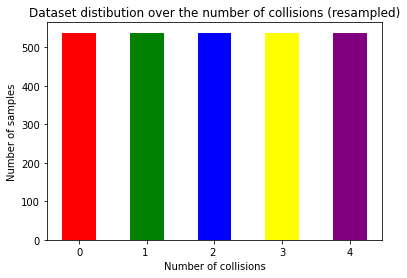

In [16]:
occorrenze_collisioni = y_res.value_counts()
fig,ax = plt.subplots()

ax.bar(x=['0','1 ','2 ','3','4'],height=occorrenze_collisioni,width=0.5, color = ['red','green','blue','yellow','purple'])
ax.set_xlabel ("Number of collisions")
ax.set_ylabel ("Number of samples")
ax.set_title('Dataset distibution over the number of collisions (resampled)')

for i in occorrenze_collisioni: 
  print("Class ",i)

print(y_res)

#Plot Dataset (Resampled and reduced)

In [18]:
mds = MDS(3,random_state=0)
X_3d = mds.fit_transform(X_res)

Numero di elementi con collisione  0 = 538
Numero di elementi con collisione  1 = 538
Numero di elementi con collisione  2 = 538
Numero di elementi con collisione  3 = 538
Numero di elementi con collisione  4 = 538


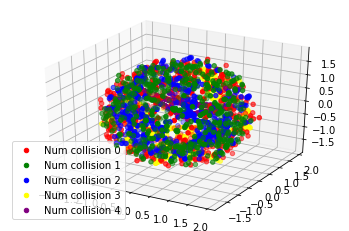

In [22]:
ax = plt.axes(projection='3d')
colors = ['red','green','blue','yellow','purple']
for i in np.unique(y_res):
  subset = X_3d[y_res == i]

  plt.rcParams['figure.figsize'] = [10, 10]
  print("Numero di elementi con collisione ",i,"=", subset.shape[0]) 
  x = [row[0] for row in subset]
  y = [row[1] for row in subset]  
  z = [row[2] for row in subset]  
  ax.scatter3D(x,y,z,c=colors[i],label="Num collision "+str(i))
  ax.legend()


In [23]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X_res,y_res,train_size=0.66,random_state=200)

print("Dataset x train :", x_train.shape)
print("Dataset y train :", y_train.shape)
print("Dataset x test :", x_test.shape)
print("Dataset y test :", y_test.shape)

Dataset x train : (1775, 35)
Dataset y train : (1775,)
Dataset x test : (915, 35)
Dataset y test : (915,)


#Altre riduzioni

In [37]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


In [58]:
def plotReduction(X, Y, color):
  methods = [
      ('LLE', LocallyLinearEmbedding(method="standard")),
      ('LTSA', LocallyLinearEmbedding(method="ltsa")),
      ('Hessian LLE', LocallyLinearEmbedding(n_neighbors=6, method="hessian", eigen_solver="dense")),
      ('Modified LLE', LocallyLinearEmbedding(method="modified")),
      ('Isomap', Isomap()),
      ('SE', SpectralEmbedding()),
      ('t-SNE', TSNE()),
      ('PCA', PCA(n_components=2))
  ]

  #plot
  for i, (label,method) in enumerate(methods):
    y = method.fit_transform(X)

    for index,x in enumerate(X):
      plt.scatter(y[index,0], y[index,1], c=color[classification_y_all[index]], cmap=plt.cm.Spectral ,label="")

    plt.title(label)
    plt.show()

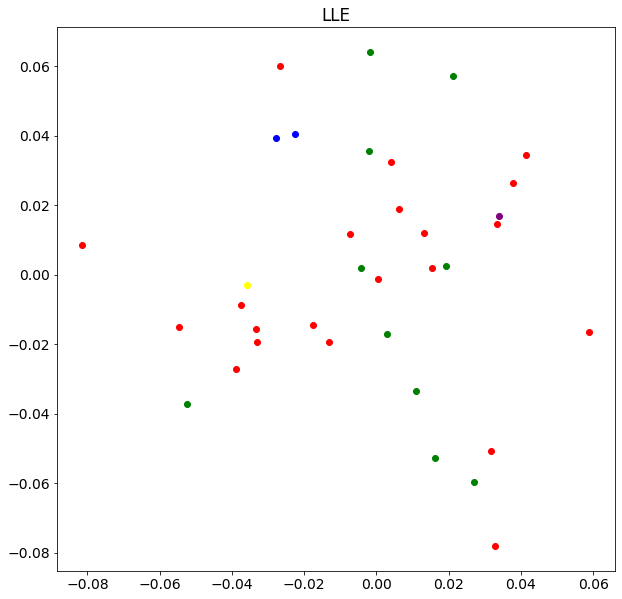

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:936: LinAlgWarning: Diagonal number 19 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)


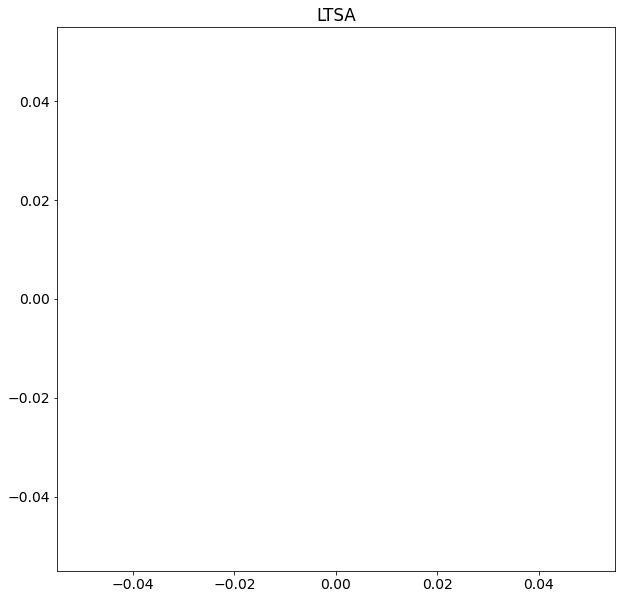

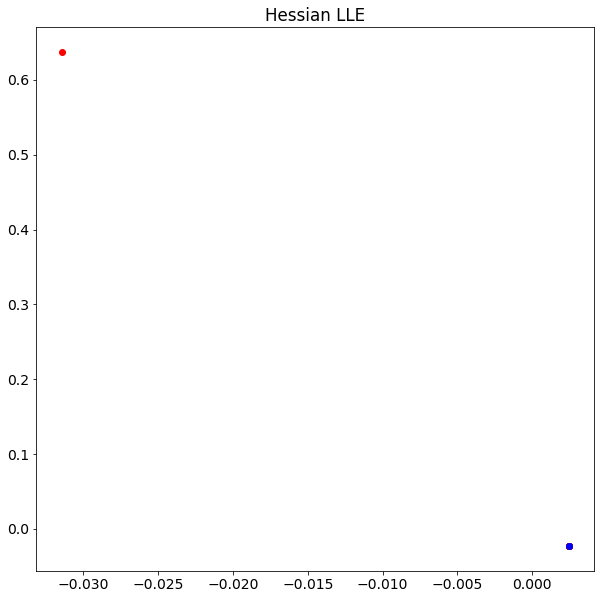

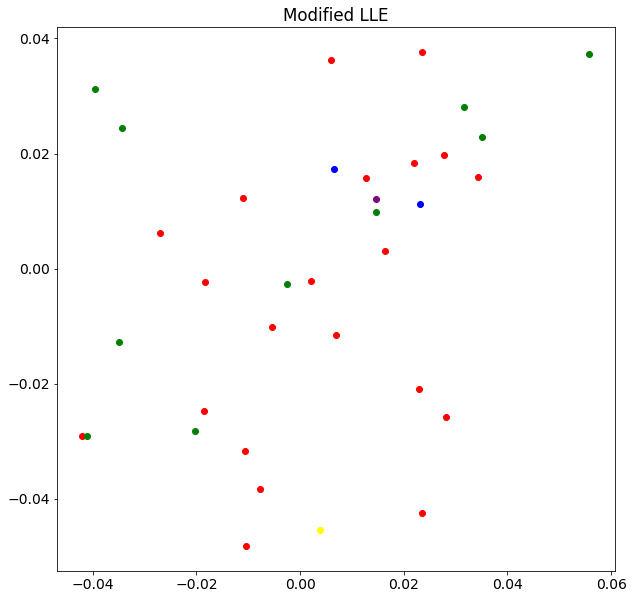

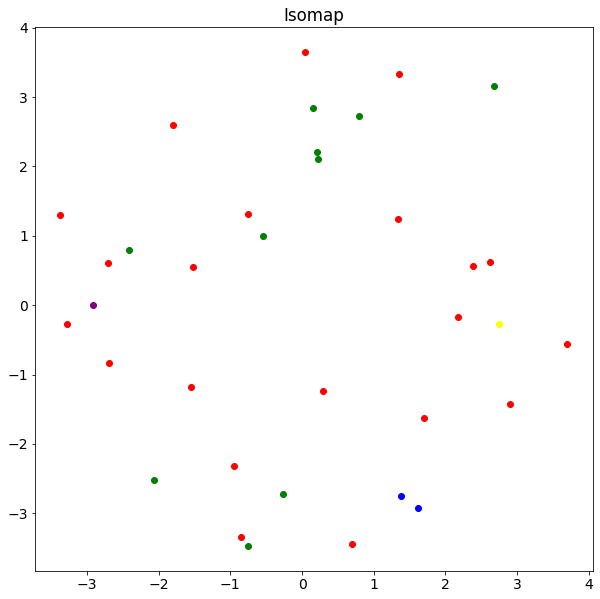

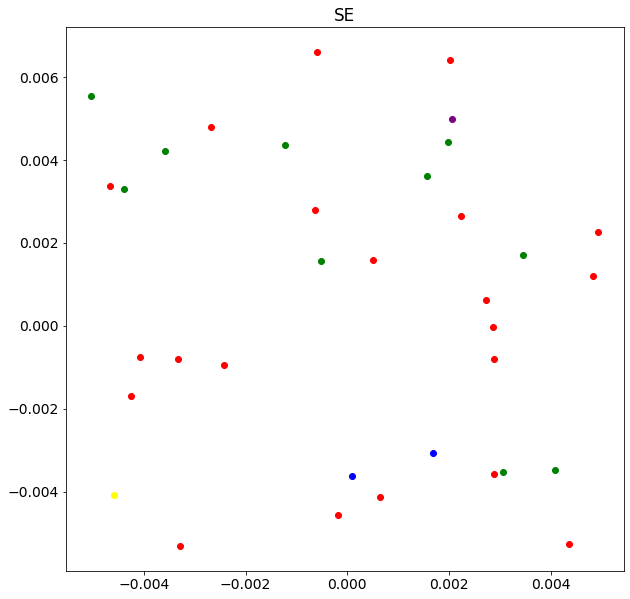

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


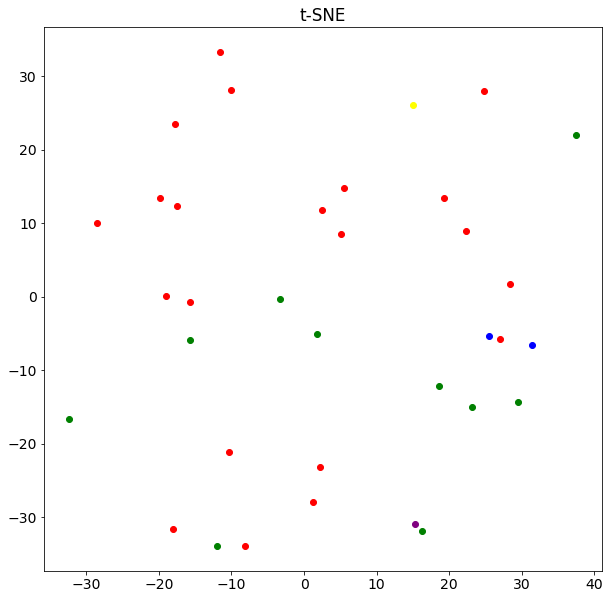

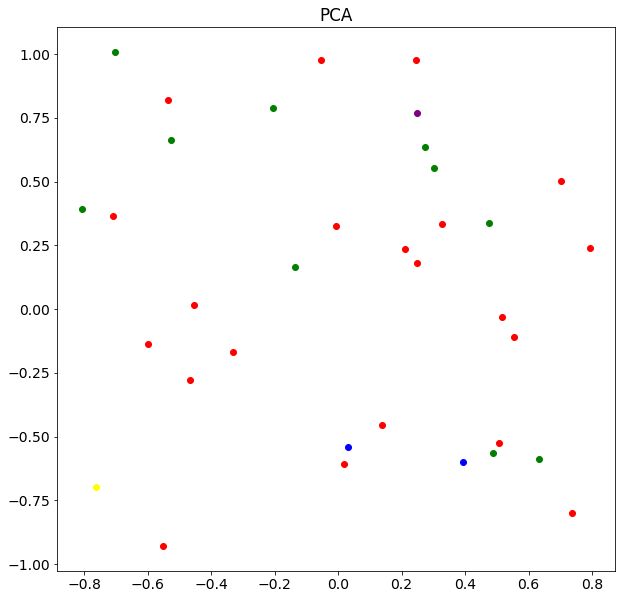

In [59]:
plotReduction(X_normalized, classification_y_all , colors)